In [42]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter


In [43]:
af=pd.read_csv(r'C:\Users\KeLi2\Downloads\paper\paper\fars数据\csv2017\trippub.csv')

In [44]:
af1=af.loc[:,['HOUSEID','HHVEHCNT','URBRUR','TRPTRANS','TRPMILAD','WTTRDFIN','PSGR_FLG','TRVLCMIN','TRPHHVEH','R_AGE_IMP','WHYTRP1S']]

In [101]:
af2=af1[(af1['TRPMILAD']>=0) & (af1['TRPMILAD']<=75.)]
af3=af2[(af2['TRVLCMIN']>0)&(af2['TRVLCMIN']<=150)]
af4=af3[af3['TRPTRANS']>0]
af4.loc[(af4['TRPTRANS'] >= 3) & (af4['TRPTRANS'] <= 9), 'TRPTRANS'] = 3
af4.loc[(af4['TRPTRANS'] >= 11) & (af4['TRPTRANS'] <= 18), 'TRPTRANS'] = 4
af4.loc[af4['TRPTRANS'] == 10, 'TRPTRANS'] = 5
af4.loc[af4['TRPTRANS'] >= 19, 'TRPTRANS'] = 6
af4.loc[af4['WHYTRP1S']==1,'WHYTRP1S']=1
af4.loc[af4['WHYTRP1S']==10,'WHYTRP1S']=2
af4.loc[af4['WHYTRP1S']==20,'WHYTRP1S']=3
af4.loc[af4['WHYTRP1S']==30,'WHYTRP1S']=4
af4.loc[af4['WHYTRP1S']==40,'WHYTRP1S']=5
af4.loc[af4['WHYTRP1S']==50,'WHYTRP1S']=6
af4.loc[af4['WHYTRP1S']==70,'WHYTRP1S']=7
af4.loc[af4['WHYTRP1S']==80,'WHYTRP1S']=8
af4.loc[af4['WHYTRP1S']==97,'WHYTRP1S']=9
af4['speed']=af4['TRPMILAD']/(af4['TRVLCMIN']/60)
af4

C:\Users\KeLi2\AppData\Local\Temp\ipykernel_4872\891902952.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af4['speed']=af4['TRPMILAD']/(af4['TRVLCMIN']/60)


,HOUSEID,HHVEHCNT,URBRUR,TRPTRANS,TRPMILAD,WTTRDFIN,PSGR_FLG,TRVLCMIN,TRPHHVEH,R_AGE_IMP,WHYTRP1S,speed
0,30000007,5,1,3,5.847584,75441.90580,2,15,1,67,3,23.390338
1,30000007,5,1,3,5.741650,75441.90580,2,20,1,67,1,17.224950
4,30000007,5,1,3,2.508975,80122.68674,2,15,1,28,3,10.035900
5,30000007,5,1,3,2.501169,80122.68674,2,15,1,28,1,10.004677
6,30000008,4,2,3,8.606250,23062.85743,2,15,1,55,2,34.424998
...,...,...,...,...,...,...,...,...,...,...,...,...
923567,50515573,0,1,1,1.168000,223357.45740,-1,27,2,52,2,2.595556
923568,50515573,0,1,1,0.238000,223357.45740,-1,8,2,52,6,1.785000
923569,50515573,0,1,1,0.238000,223357.45740,-1,5,2,52,2,2.856000
923570,50515573,0,1,1,0.867000,223357.45740,-1,25,2,52,5,2.080800


C:\Users\KeLi2\AppData\Local\Temp\ipykernel_4872\3697222024.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i)


Text(0.5, 0.98, 'H3')

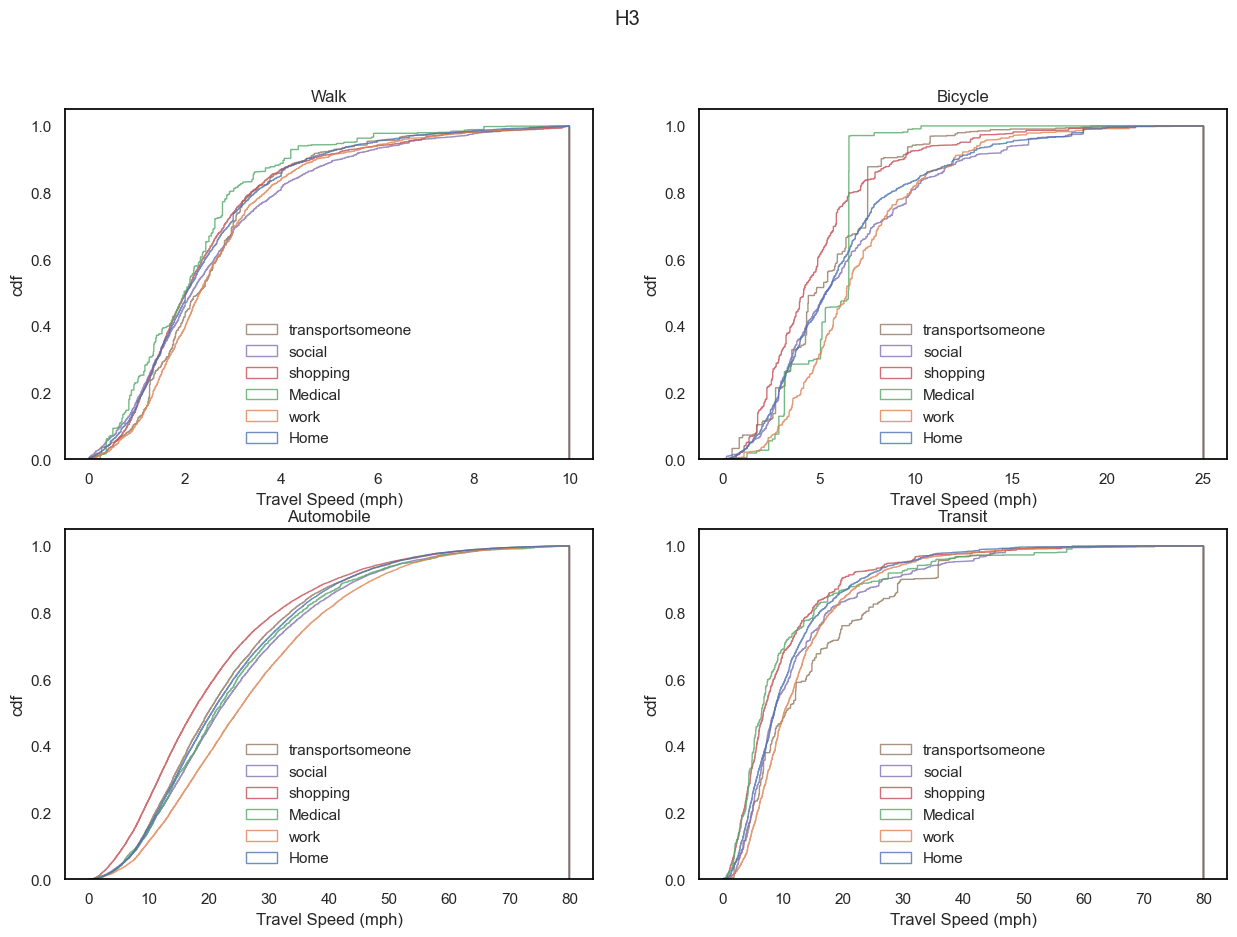

In [105]:
plt.figure(figsize=(15,10))
plt.tight_layout(pad=4.0)
for i in np.arange(1,5):
    df1=af4[(af4['WHYTRP1S']==1)&(af4['TRPTRANS']==i)]
    df2=af4[(af4['WHYTRP1S']==2)&(af4['TRPTRANS']==i)]
    df3=af4[(af4['WHYTRP1S']==4)&(af4['TRPTRANS']==i)]
    df4=af4[(af4['WHYTRP1S']==5)&(af4['TRPTRANS']==i)]
    df5=af4[(af4['WHYTRP1S']==6)&(af4['TRPTRANS']==i)]
    df6=af4[(af4['WHYTRP1S']==7)&(af4['TRPTRANS']==i)]
    data1=df1['speed']
    weight1=df1['WTTRDFIN']
    data2=df2['speed']
    weight2=df2['WTTRDFIN']
    data3=df3['speed']
    weight3=df3['WTTRDFIN']
    data4=df4['speed']
    weight4=df4['WTTRDFIN']
    data5=df5['speed']
    weight5=df5['WTTRDFIN']
    data6=df6['speed']
    weight6=df6['WTTRDFIN']
    data=[data1,data2,data3,data4,data5,data6]
    weight=[weight1,weight2,weight3,weight4,weight5,weight6]
    label1=['Home','work','Medical','shopping','social','transportsomeone']
    title=['Walk','Bicycle','Automobile','Transit','School Bus','Others']
    ax = plt.gca()  # Get the current axes
    ax.set_facecolor('white')
    ax.spines['left'].set_color('black')     # Set the line width for the top spine
    ax.spines['top'].set_color('black')     # Set the color for the top spine
    ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
    ax.spines['right'].set_color('black')# Set the color for the bottom spine
    if i ==1:
        plt.subplot(2,2,i)
        plt.hist(data, bins=5000, density=True,range=(0,10), cumulative= True, label=label1,alpha=0.8,histtype='step',weights=weight)
        plt.xlabel('Travel Speed (mph)')
        plt.ylabel('cdf')
        plt.title(title[i-1])
        plt.legend(facecolor='white',edgecolor='white')
    elif i == 2:
        plt.subplot(2,2,i)
        plt.hist(data, bins=5000, density=True,range=(0,25), cumulative= True, label=label1,alpha=0.8,histtype='step',weights=weight)
        plt.xlabel('Travel Speed (mph)')
        plt.ylabel('cdf')
        plt.title(title[i-1])
        plt.legend(facecolor='white',edgecolor='white')
    else:
        plt.subplot(2,2,i)
        plt.hist(data, bins=5000, density=True,range=(0,80), cumulative= True, label=label1,alpha=0.8,histtype='step',weights=weight)
        plt.xlabel('Travel Speed (mph)')
        plt.ylabel('cdf')
        plt.title(title[i-1])
        ax = plt.gca()  # Get the current axes
        ax.set_facecolor('white')
        ax.spines['left'].set_color('black')     # Set the line width for the top spine
        ax.spines['top'].set_color('black')     # Set the color for the top spine
        ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
        ax.spines['right'].set_color('black')# Set the color for the bottom spine
        plt.legend(facecolor='white',edgecolor='white')
plt.suptitle('H3')


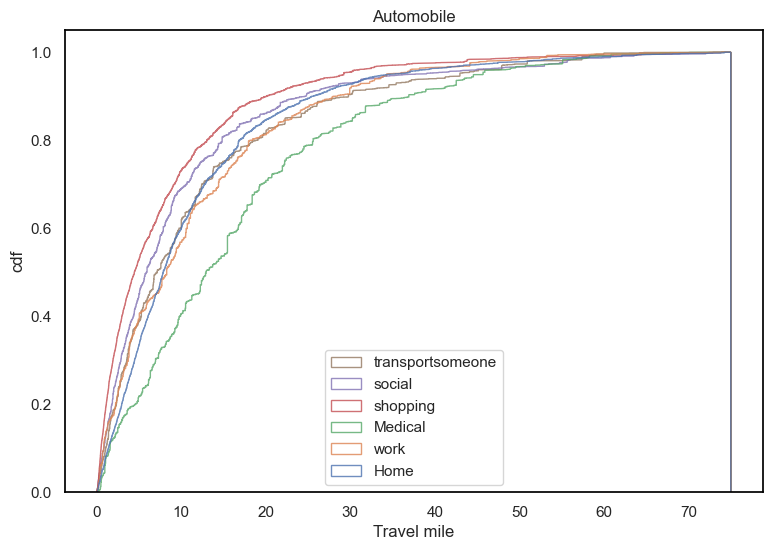

In [87]:
af5=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==2)]
df1=af5[(af5['WHYTRP1S']==1)&(af5['TRPTRANS']==3)]
df2=af5[(af5['WHYTRP1S']==2)&(af5['TRPTRANS']==3)]
df3=af5[(af5['WHYTRP1S']==4)&(af5['TRPTRANS']==3)]
df4=af5[(af5['WHYTRP1S']==5)&(af5['TRPTRANS']==3)]
df5=af5[(af5['WHYTRP1S']==6)&(af5['TRPTRANS']==3)]
df6=af5[(af5['WHYTRP1S']==7)&(af5['TRPTRANS']==3)]
data1=df1['TRPMILAD']
weight1=df1['WTTRDFIN']
data2=df2['TRPMILAD']
weight2=df2['WTTRDFIN']
data3=df3['TRPMILAD']
weight3=df3['WTTRDFIN']
data4=df4['TRPMILAD']
weight4=df4['WTTRDFIN']
data5=df5['TRPMILAD']
weight5=df5['WTTRDFIN']
data6=df6['TRPMILAD']
weight6=df6['WTTRDFIN']
data=[data1,data2,data3,data4,data5,data6]
weight=[weight1,weight2,weight3,weight4,weight5,weight6]
label1=['Home','work','Medical','shopping','social','transportsomeone']
title=['Walk','Bicycle','Automobile','Transit','School Bus','Others']
fig = plt.figure(figsize=(9, 6))
ax = plt.gca()  # Get the current axes
ax.set_facecolor('white')
ax.spines['left'].set_color('black')     # Set the line width for the top spine
ax.spines['top'].set_color('black')     # Set the color for the top spine
ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
ax.spines['right'].set_color('black')# Set the color for the bottom spine
plt.hist(data, bins=5000, density=True,range=(0,75), cumulative= True, label=label1,alpha=0.8,histtype='step',weights=weight)
plt.xlabel('Travel mile')
plt.ylabel('cdf')
plt.title(title[2])
bx=plt.legend(facecolor='white')
plt.grid(False)
plt.show()